In [10]:
from mplsoccer import Pitch, VerticalPitch, Sbopen
parser = Sbopen()

In [17]:
df_eventos, df2, df3, df4 = parser.event(3943077)

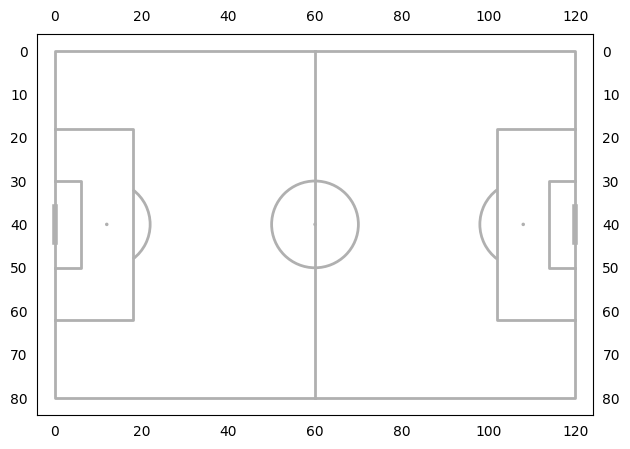

In [18]:
pitch = Pitch(
    label=True,
    axis=True,
    pitch_type='statsbomb'
)

fig, ax = pitch.draw()

In [21]:
df_eventos.type_name.value_counts()

type_name
Pass                 1196
Ball Receipt         1112
Carry                 940
Pressure              316
Ball Recovery          89
Duel                   80
Block                  45
Goal Keeper            40
Dribble                36
Shot                   30
Foul Committed         30
Foul Won               29
Clearance              28
Dispossessed           22
Dribbled Past          19
Miscontrol             17
Interception           16
Substitution           12
Half End                8
Half Start              8
Referee Ball-Drop       8
Injury Stoppage         7
50/50                   6
Shield                  4
Tactical Shift          4
Starting XI             2
Offside                 1
Player On               1
Player Off              1
Bad Behaviour           1
Name: count, dtype: int64

In [22]:
tiros = df_eventos[df_eventos['type_name'] == 'Shot']

In [25]:
tiros.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'pass_switch',
       'under_pressure', 'outcome_id', 'outcome_name', 'pass_cross',
       'pass_assisted_shot_id', 'pass_shot_assist', 'shot_statsbomb_xg',
       'end_z', 'shot_key_pass_id', 'shot_first_time', 'technique_id',
       'technique_name', 'goalkeeper_position_id', 'goalkeeper_position_name',
       'off_camera', 'out', 'aerial_won', 'counterpress',
       'pass_miscommunication', 'block_offensive', 'dribble_nut

In [28]:
tiros_argentina = tiros[tiros['team_name'] == 'Argentina']
tiros_colombia = tiros[tiros['team_name'] == 'Colombia']

In [29]:
tiros_argentina.shape, tiros_colombia.shape

((11, 75), (19, 75))

In [34]:
tiros_argentina[['x', 'y']]

,x,y
36,105.6,44.0
827,106.2,36.8
1665,108.1,39.3
1928,110.9,25.6
2175,107.2,35.0
2229,107.5,24.9
3047,111.1,42.0
3298,110.1,35.3
3424,118.6,31.5
3867,105.5,52.1


In [38]:
tiros_argentina.outcome_name

36        Off T
827     Blocked
1665      Off T
1928      Saved
2175    Blocked
2229      Saved
3047      Off T
3298      Saved
3424      Saved
3867       Goal
4046    Wayward
Name: outcome_name, dtype: object

In [59]:
goles_argentina = tiros_argentina[tiros_argentina['outcome_name'] == 'Goal']
tiros_no_gol_argentina = tiros_argentina[tiros_argentina['outcome_name'] != 'Goal']

goles_colombia = tiros_colombia[tiros_colombia['outcome_name'] == 'Goal']
tiros_no_gol_colombia = tiros_colombia[tiros_colombia['outcome_name'] != 'Goal']

Text(0.5, 1.0, 'Mapa de tiros de Argentina en el partido vs. Colombia - Final Copa America 2024')

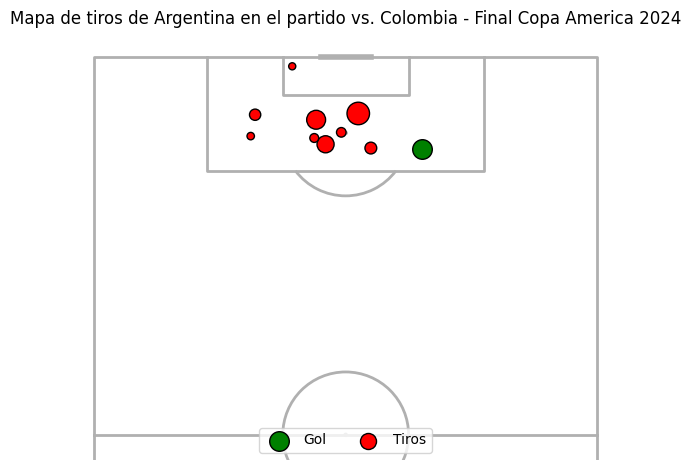

In [58]:
pitch = VerticalPitch(
    pitch_type='statsbomb',
    half = True
)

fig, ax = pitch.draw()

goles = pitch.scatter(
    x = goles_argentina.x,
    y = goles_argentina.y,
    ax=ax,
    color = 'green',
    label = 'Gol',
    s = goles_argentina.shot_statsbomb_xg*1000,
    edgecolor='black'
)

no_goles = pitch.scatter(
    x = tiros_no_gol_argentina.x,
    y = tiros_no_gol_argentina.y,
    ax=ax,
    color = 'red',
    label = 'Tiros',
    s = tiros_no_gol_argentina.shot_statsbomb_xg*1000,
    edgecolor='black'
)

ax.legend(loc = 'lower center', ncols=2)
ax.set_title('Mapa de tiros de Argentina en el partido vs. Colombia - Final Copa America 2024')

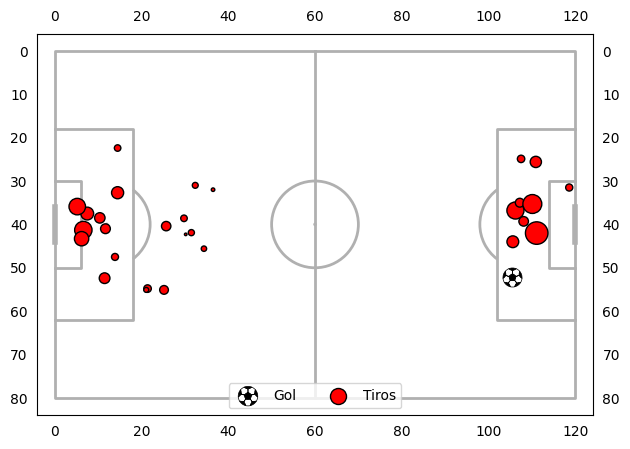

In [70]:
pitch = Pitch(
    pitch_type='statsbomb',
    axis = True,
    label = True
)

fig, ax = pitch.draw()

#Argentina

pitch.scatter(
    x = goles_argentina.x,
    y = goles_argentina.y,
    ax=ax,
    marker = 'football',
    label = 'Gol',
    s = goles_argentina.shot_statsbomb_xg*1000,
)

pitch.scatter(
    x = tiros_no_gol_argentina.x,
    y = tiros_no_gol_argentina.y,
    ax=ax,
    color = 'red',
    label = 'Tiros',
    s = tiros_no_gol_argentina.shot_statsbomb_xg*1000,
    edgecolor='black'
)

#Colombia

pitch.scatter(
    x = 120 - goles_colombia.x,
    y = 80 - goles_colombia.y,
    ax=ax,
    color = 'green',
    s = goles_colombia.shot_statsbomb_xg*1000,
    edgecolor='black'
)

pitch.scatter(
    x = 120 - tiros_no_gol_colombia.x,
    y = 80 - tiros_no_gol_colombia.y,
    ax=ax,
    color = 'red',
    s = tiros_no_gol_colombia.shot_statsbomb_xg*1000,
    edgecolor='black'
)

ax.legend(loc = 'lower center', ncols=2)